In [207]:
import pandas as pd
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [142]:
driver = pd.read_csv("driver_ids.csv")
rider = pd.read_csv("ride_ids.csv")
timestamps = pd.read_csv("ride_timestamps.csv")

In [143]:
pivot_timestamps = timestamps.pivot(index='ride_id', columns='event', values='timestamp')
pivot_timestamps.reset_index(level=0, inplace=True)
pivot_timestamps

event,ride_id,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
0,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
1,00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21
2,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09
3,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:40:47,2016-05-11 19:35:15,2016-05-11 19:29:36
4,0000d9b24d8ccdd991b76258e616fa01,2016-04-26 18:12:15,2016-04-26 18:16:52,2016-04-26 18:24:14,2016-04-26 18:16:55,2016-04-26 18:11:38
5,00012759befd5d34a0609800f6a1ee59,2016-05-31 15:45:05,2016-05-31 15:46:22,2016-05-31 15:59:26,2016-05-31 15:46:23,2016-05-31 15:44:56
6,0001480a2c27492b1f8cb5fbc38ca667,2016-06-05 01:58:52,2016-06-05 02:08:35,2016-06-05 02:19:07,2016-06-05 02:08:34,2016-06-05 01:58:44
7,0002033cf1878734f3ffec9ad9748b3e,2016-05-28 21:03:52,2016-05-28 21:05:27,2016-05-28 21:12:29,2016-05-28 21:05:28,2016-05-28 21:03:45
8,0002090d41c4050b1683e3c4f69ed1c4,2016-06-23 16:12:37,2016-06-23 16:19:46,2016-06-23 16:56:39,2016-06-23 16:19:49,2016-06-23 16:12:31
9,00024c06e3554012303d4caa449222f3,2016-06-19 01:55:58,2016-06-19 02:02:41,2016-06-19 02:08:53,2016-06-19 02:03:19,2016-06-19 01:55:52


In [144]:
rider['duration_min'] = rider['ride_duration'].apply(lambda x: x / 60)


In [145]:
rider['time_money'] = rider['duration_min'].apply(lambda x: x * 0.22)


In [146]:
rider['distance_mi'] = rider['ride_distance'].apply(lambda x: x *  0.00062137)

In [147]:
rider['dist_money'] = rider['distance_mi'].apply(lambda x: x * 1.15)

In [148]:
rider['total cost'] = ((rider['dist_money'] + rider['time_money']) * (1 + (0.01 * rider['ride_prime_time']))) + 2 + 1.75

In [149]:
rider['total cost'] = rider['total cost'].apply(lambda x: x if x <= 400 else 400)

In [150]:
rider['total cost'] = rider['total cost'].apply(lambda x: x if x >= 5 else 5)

# Timestamps + Costs

In [151]:
drive = rider.drop(['ride_id', 'ride_distance', 'ride_duration',], axis = 1)

In [152]:
combined_timestamps = pd.merge(rider,pivot_timestamps,on = 'ride_id', how = 'inner')
combined_timestamps = combined_timestamps.drop(['ride_distance','ride_duration'], axis = 1)
combined_timestamps

,driver_id,ride_id,ride_prime_time,duration_min,time_money,distance_mi,dist_money,total cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,50,5.450000,1.199000,1.125301,1.294096,7.489644,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,0,13.483333,2.966333,2.089046,2.402403,9.118736,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,0,9.533333,2.097333,2.039336,2.345237,8.192570,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,25,55.633333,12.239333,40.564898,46.649632,77.361207,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19 09:18:20,2016-05-19 09:15:29
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,100,13.716667,3.017667,2.556938,2.940478,15.666290,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:20:45,2016-04-20 22:07:02,2016-04-20 22:05:30
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,100,15.283333,3.362333,3.002460,3.452829,17.380324,2016-06-21 08:29:24,2016-06-21 08:35:33,2016-06-21 08:50:53,2016-06-21 08:35:36,2016-06-21 08:29:17
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,0,5.783333,1.272333,0.978658,1.125456,6.147790,2016-04-16 22:28:08,2016-04-16 22:29:10,2016-04-16 22:35:02,2016-04-16 22:29:15,2016-04-16 22:28:05
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,25,11.450000,2.519000,1.898907,2.183743,9.628428,2016-04-01 21:53:12,2016-04-01 21:54:15,2016-04-01 22:05:41,2016-04-01 21:54:14,2016-04-01 21:53:09
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,75,19.050000,4.191000,2.448198,2.815427,16.011248,2016-05-25 16:27:03,2016-05-25 16:38:20,2016-05-25 16:57:25,2016-05-25 16:38:22,2016-05-25 16:26:32
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,50,14.466667,3.182667,2.458761,2.827575,12.765363,2016-06-10 09:20:19,2016-06-10 09:27:12,2016-06-10 09:41:42,2016-06-10 09:27:14,2016-06-10 09:20:16


In [153]:
sample1 = combined_timestamps[combined_timestamps['driver_id'] == '002be0ffdc997bd5c50703158b7c2491']
sample2 = combined_timestamps[combined_timestamps['driver_id'] == 'ffff51a71f2f185ec5e97d59dbcd7a78']

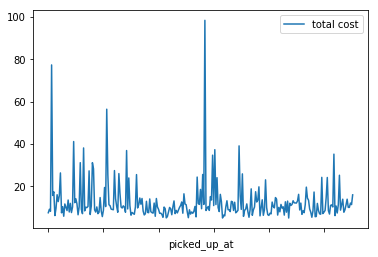

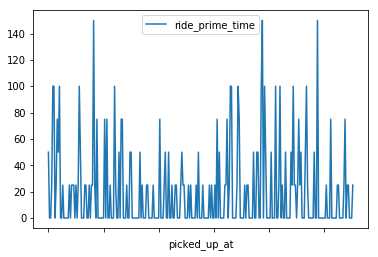

In [154]:
sample1.plot.line(x = 'picked_up_at', y = 'total cost')
sample1.plot.line(x = 'picked_up_at', y = 'ride_prime_time')

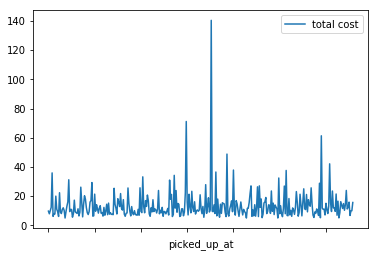

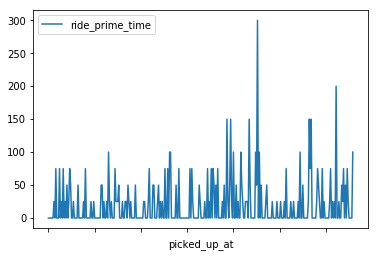

In [155]:
sample2.plot.line(x = 'picked_up_at', y = 'total cost')
sample2.plot.line(x = 'picked_up_at', y = 'ride_prime_time')

In [156]:
test = combined_timestamps
#test.set_index(['picked_up_at'],inplace=True)


In [157]:
test = test.drop(['ride_id','ride_prime_time','duration_min','time_money','distance_mi','dist_money','accepted_at','arrived_at','dropped_off_at','requested_at'], axis = 1)


In [158]:
test

,driver_id,total cost,picked_up_at
0,002be0ffdc997bd5c50703158b7c2491,7.489644,2016-04-23 02:16:40
1,002be0ffdc997bd5c50703158b7c2491,9.118736,2016-03-29 19:04:01
2,002be0ffdc997bd5c50703158b7c2491,8.192570,2016-06-21 12:01:35
3,002be0ffdc997bd5c50703158b7c2491,77.361207,2016-05-19 09:18:20
4,002be0ffdc997bd5c50703158b7c2491,15.666290,2016-04-20 22:07:02
5,002be0ffdc997bd5c50703158b7c2491,17.380324,2016-06-21 08:35:36
6,002be0ffdc997bd5c50703158b7c2491,6.147790,2016-04-16 22:29:15
7,002be0ffdc997bd5c50703158b7c2491,9.628428,2016-04-01 21:54:14
8,002be0ffdc997bd5c50703158b7c2491,16.011248,2016-05-25 16:38:22
9,002be0ffdc997bd5c50703158b7c2491,12.765363,2016-06-10 09:27:14


In [159]:
test.rename(columns={'total cost':'total_cost'}, inplace=True)
test['Time stamp'] = pd.to_datetime(test['picked_up_at'].str.strip(), format='%Y-%m-%d %H:%M:%S')

In [160]:
test['just_date'] = test['Time stamp'].dt.date

In [161]:
pd.set_option('display.max_rows', 1000)
test_sample = test[:277]

In [162]:
test_sample

,driver_id,total_cost,picked_up_at,Time stamp,just_date
0,002be0ffdc997bd5c50703158b7c2491,7.489644,2016-04-23 02:16:40,2016-04-23 02:16:40,2016-04-23
1,002be0ffdc997bd5c50703158b7c2491,9.118736,2016-03-29 19:04:01,2016-03-29 19:04:01,2016-03-29
2,002be0ffdc997bd5c50703158b7c2491,8.192570,2016-06-21 12:01:35,2016-06-21 12:01:35,2016-06-21
3,002be0ffdc997bd5c50703158b7c2491,77.361207,2016-05-19 09:18:20,2016-05-19 09:18:20,2016-05-19
4,002be0ffdc997bd5c50703158b7c2491,15.666290,2016-04-20 22:07:02,2016-04-20 22:07:02,2016-04-20
5,002be0ffdc997bd5c50703158b7c2491,17.380324,2016-06-21 08:35:36,2016-06-21 08:35:36,2016-06-21
6,002be0ffdc997bd5c50703158b7c2491,6.147790,2016-04-16 22:29:15,2016-04-16 22:29:15,2016-04-16
7,002be0ffdc997bd5c50703158b7c2491,9.628428,2016-04-01 21:54:14,2016-04-01 21:54:14,2016-04-01
8,002be0ffdc997bd5c50703158b7c2491,16.011248,2016-05-25 16:38:22,2016-05-25 16:38:22,2016-05-25
9,002be0ffdc997bd5c50703158b7c2491,12.765363,2016-06-10 09:27:14,2016-06-10 09:27:14,2016-06-10


Text(0, 0.5, 'money')

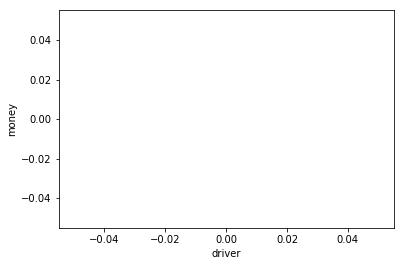

In [163]:
fig,ax = plt.subplots()
for name in test_sample['driver_id'].tolist():
    ax.plot(test_sample[test_sample.driver_id=='driver_id'].just_date,test_sample[test_sample.driver_id=='driver_id'].total_cost,label=name)

ax.set_xlabel("driver")
ax.set_ylabel("money")

# Totaling everything

In [166]:
df = pd.DataFrame()

df = drive.groupby(['driver_id'], as_index=False).size()
df = df.to_frame().reset_index()
df = df.rename(columns= {0: 'rides'})
drive = drive.groupby(['driver_id'],as_index=False).sum()
combined = pd.merge(drive,df,on = 'driver_id', how = 'inner')

In [167]:
combined_date = pd.merge(combined,driver, on = 'driver_id', how = 'inner')

In [168]:
combined_date['average prime'] = combined_date['ride_prime_time'] / combined_date['rides']

In [169]:
combined_date

,driver_id,ride_prime_time,duration_min,time_money,distance_mi,dist_money,total cost,rides,driver_onboard_date,average prime
0,002be0ffdc997bd5c50703158b7c2491,5375,3687.300000,811.206000,1081.362133,1243.566453,3453.419687,277,2016-03-29 00:00:00,19.404332
1,007f0389f9c7b03ef97098422f902e62,625,341.616667,75.155667,73.030237,83.984773,308.994506,31,2016-03-29 00:00:00,20.161290
2,011e5c5dfc5c2c92501b8b24d47509bc,675,486.750000,107.085000,167.554285,192.687427,468.927442,34,2016-04-05 00:00:00,19.852941
3,0152a2f305e71d26cc964f8d4411add9,2050,2908.683333,639.910333,914.183777,1051.311344,2569.866550,191,2016-04-23 00:00:00,10.732984
4,01674381af7edd264113d4e6ed55ecda,4700,5957.383333,1310.624333,1940.938672,2232.079473,5287.086873,375,2016-04-29 00:00:00,12.533333
5,0213f8b59219e32142711992ca4ec01f,2475,2997.966667,659.552667,969.285005,1114.677756,2891.654771,240,2016-04-07 00:00:00,10.312500
6,021e5cd15ef0bb3ec20a12af99e142b3,1200,840.783333,184.972333,160.108408,184.124669,662.241103,53,2016-05-07 00:00:00,22.641509
7,0258e250ca195cc6258cbdc75aecd853,3500,4485.916667,986.901667,1531.436580,1761.152067,4210.362722,302,2016-04-26 00:00:00,11.589404
8,028b5a4dcd7f4924ebfabcf2e814c014,3975,5842.816667,1285.419667,1834.670111,2109.870627,5118.254777,363,2016-05-06 00:00:00,10.950413
9,02d6a6b8a6da15fc219a9570f7ebbe78,225,1608.116667,353.785667,994.017395,1143.120004,1561.571428,62,2016-05-03 00:00:00,3.629032


In [172]:
pred = combined_date.drop(['driver_id', 'average prime', 'driver_onboard_date', 'time_money', 'dist_money'], axis = 1)

In [173]:
pred

,ride_prime_time,duration_min,distance_mi,total cost,rides
0,5375,3687.300000,1081.362133,3453.419687,277
1,625,341.616667,73.030237,308.994506,31
2,675,486.750000,167.554285,468.927442,34
3,2050,2908.683333,914.183777,2569.866550,191
4,4700,5957.383333,1940.938672,5287.086873,375
5,2475,2997.966667,969.285005,2891.654771,240
6,1200,840.783333,160.108408,662.241103,53
7,3500,4485.916667,1531.436580,4210.362722,302
8,3975,5842.816667,1834.670111,5118.254777,363
9,225,1608.116667,994.017395,1561.571428,62


In [174]:
numerical_columns = [col for col in pred.columns if (pred[col].dtype=='int64' or pred[col].dtype=='float64') and col != 'Exited']

In [176]:
pred[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,ride_prime_time,duration_min,distance_mi,total cost,rides
min,0.000000,28.533333,6.148456,25.691293,3.00000
max,19675.000000,12996.616667,4118.565255,12017.764692,919.00000
mean,3779.976581,3118.229450,938.201341,2869.708691,217.67096
50%,3275.000000,3095.800000,877.637901,2845.032938,223.00000


(array([293.,  59.,  56.,  70., 101.,  69.,  58.,  41.,  36.,  20.,  10.,
         14.,   8.,   4.,   4.,   4.,   2.,   3.,   1.,   1.]),
 array([    0.  ,   983.75,  1967.5 ,  2951.25,  3935.  ,  4918.75,
         5902.5 ,  6886.25,  7870.  ,  8853.75,  9837.5 , 10821.25,
        11805.  , 12788.75, 13772.5 , 14756.25, 15740.  , 16723.75,
        17707.5 , 18691.25, 19675.  ]),
 <a list of 20 Patch objects>)

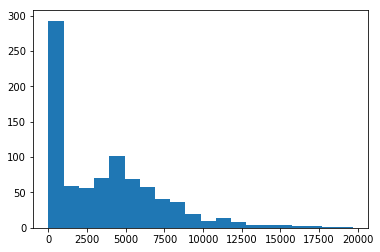

In [177]:
plt.hist(combined_date["ride_prime_time"],bins=20)

(array([231., 113.,   7.,  29.,  79.,  90.,  77.,  54.,  45.,  34.,  27.,
         27.,  12.,  11.,   9.,   3.,   2.,   1.,   1.,   2.]),
 array([   28.53333333,   676.9375    ,  1325.34166667,  1973.74583333,
         2622.15      ,  3270.55416667,  3918.95833333,  4567.3625    ,
         5215.76666667,  5864.17083333,  6512.575     ,  7160.97916667,
         7809.38333333,  8457.7875    ,  9106.19166667,  9754.59583333,
        10403.        , 11051.40416667, 11699.80833333, 12348.2125    ,
        12996.61666667]),
 <a list of 20 Patch objects>)

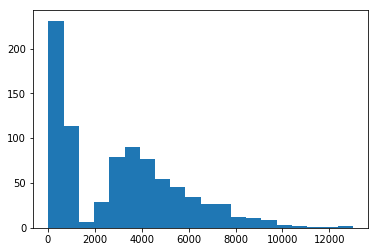

In [178]:
plt.hist(combined_date["duration_min"],bins=20)

(array([214., 118.,  28.,  45.,  98.,  79.,  66.,  57.,  42.,  37.,  16.,
         20.,   6.,   7.,  10.,   4.,   1.,   2.,   2.,   2.]),
 array([   6.14845615,  211.76929611,  417.39013607,  623.01097603,
         828.63181599, 1034.25265595, 1239.87349592, 1445.49433588,
        1651.11517584, 1856.7360158 , 2062.35685576, 2267.97769572,
        2473.59853568, 2679.21937564, 2884.8402156 , 3090.46105556,
        3296.08189553, 3501.70273549, 3707.32357545, 3912.94441541,
        4118.56525537]),
 <a list of 20 Patch objects>)

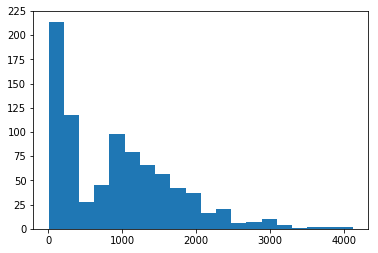

In [180]:
plt.hist(combined_date["distance_mi"],bins=20)

(array([219., 121.,  12.,  25.,  82.,  97.,  72.,  51.,  55.,  34.,  26.,
         18.,  12.,  11.,   8.,   5.,   1.,   3.,   0.,   2.]),
 array([   25.69129339,   625.29496333,  1224.89863326,  1824.50230319,
         2424.10597312,  3023.70964306,  3623.31331299,  4222.91698292,
         4822.52065285,  5422.12432279,  6021.72799272,  6621.33166265,
         7220.93533258,  7820.53900252,  8420.14267245,  9019.74634238,
         9619.35001231, 10218.95368225, 10818.55735218, 11418.16102211,
        12017.76469204]),
 <a list of 20 Patch objects>)

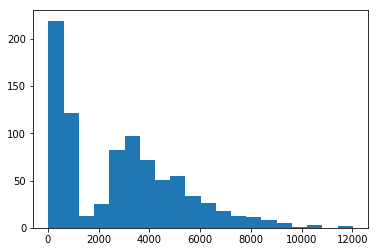

In [182]:
plt.hist(combined_date["total cost"],bins=20)

In [187]:
feat = pred.drop(columns=['total cost'],axis=1)
label = pred["total cost"]
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3)

In [195]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)
lab_enc = preprocessing.LabelEncoder()


In [204]:
#training_scores_encoded = lab_enc.fit_transform(y_train)

In [212]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,training_scores_encoded)
y_pred_svc = support_vector_classifier.predict(X_test)

NameError: name 'clf' is not defined

In [206]:
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [209]:
from xgboost import XGBClassifier

In [210]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

In [211]:
cm_xgb_classifier = confusion_matrix(y_test,y_pred_xgb)
print(cm_xgb_classifier,end='\n\n')

ValueError: continuous is not supported